In [7]:
import numpy as np 
import pandas as pd 

from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing

import re

import os
print(os.listdir("./input"))

['realestateevaluation', 'subbmission.csv', 'submission.csv', 'test.csv', 'train.csv']


In [8]:
train = pd.read_csv('./input/train.csv')
train

C:\Users\wilso\.conda\envs\Tendorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,主要建材,主要用途,交易年月日,交易標的,交易筆棟數,備註,土地區段位置/建物區段門牌,土地移轉總面積(平方公尺),建物型態,...,num_of_bus_stations_in_100m,income_avg,income_var,location_type,low_use_electricity,nearest_tarin_station,nearest_tarin_station_distance,lat,lng,單價(元/平方公尺)
0,0,NaN,NaN,0105-12-06 00:00:00,土地,土地7建物0車位0,NaN,溪洲段二小段211~240地號,98.57,其他,...,0.0,NaN,NaN,GEOMETRIC_CENTER,NaN,小碧潭站,748.079130,24.965286,121.530247,60870.0
1,1,鋼筋混凝土造,NaN,0104-12-31 00:00:00,房地(土地+建物),土地3建物1車位0,親友、員工或其他特殊關係間之交易。,臺北市中正區三元街172巷1弄1~30號,40.25,公寓(5樓含以下無電梯),...,5.0,1105.0,240.68,ROOFTOP,8.57%,小南門站,897.593403,25.027474,121.511319,117550.0
2,2,鋼骨鋼筋混凝土造,住家用,0104-09-11 00:00:00,房地(土地+建物)+車位,土地1建物1車位4,NaN,臺北市南港區經貿二路235巷1~30號,112.21,住宅大樓(11層含以上有電梯),...,4.0,1423.0,174.00,RANGE_INTERPOLATED,16.59%,南港軟體園區站,104.595160,25.060303,121.614971,231650.0
3,3,加強磚造,住家用,0104-11-15 00:00:00,房地(土地+建物),土地1建物1車位0,NaN,臺北市文山區景興路108巷1~30號,33.50,公寓(5樓含以下無電梯),...,2.0,1104.0,124.78,ROOFTOP,4.48%,景美站,358.446943,24.993959,121.544340,127419.0
4,4,鋼筋混凝土造,商業用,0106-07-31 00:00:00,房地(土地+建物),土地1建物1車位0,NaN,臺北市中山區中山北路二段93巷1~30號,7.75,住宅大樓(11層含以上有電梯),...,0.0,998.0,290.07,ROOFTOP,10.96%,雙連站,320.019329,25.059420,121.523301,272743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69165,69165,鋼筋混凝土造,見其他登記事項,0106-09-30 00:00:00,房地(土地+建物)+車位,土地1建物1車位1,NaN,臺北市文山區下崙路11巷1~30號,33.01,華廈(10層含以下有電梯),...,2.0,1046.0,122.75,ROOFTOP,5.66%,萬芳醫院站,1463.742646,24.986362,121.560260,140892.0
69166,69166,NaN,NaN,0104-12-30 00:00:00,土地,土地1建物0車位0,向政府機關承購之案件。,天玉段二小段391~420地號,50.79,其他,...,1.0,2194.0,471.48,ROOFTOP,9.56%,石牌站,1812.807252,25.122920,121.530986,15810.0
69167,69167,鋼筋混凝土造,住家用,0106-08-20 00:00:00,房地(土地+建物),土地1建物1車位0,含增建或未登記建物。,臺北市中山區伊通街121~150號,6.09,套房(1房1廳1衛),...,2.0,1085.0,140.60,ROOFTOP,6.66%,松江南京站,372.742705,25.053933,121.534919,238095.0
69168,69168,鋼筋混凝土造,住家用,0106-11-20 00:00:00,房地(土地+建物),土地3建物1車位0,含增建或未登記建物。,臺北市中山區錦西街1~30號,22.63,華廈(10層含以下有電梯),...,2.0,1190.0,340.87,ROOFTOP,7.80%,雙連站,336.792557,25.060371,121.522537,189006.0


In [9]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
submission = pd.read_csv('./input/submission.csv')

drop_list = ['index', '非都市土地使用編定', '編號']

train.drop(drop_list, axis=1, inplace=True)
test.drop(drop_list, axis=1, inplace=True)

train = train[train['單價(元/平方公尺)'] < 3000000]
train = train[train['土地移轉總面積(平方公尺)'] < 1000]
train = train[train['建物移轉總面積(平方公尺)'] < 1000]
train = train[train['車位移轉總面積(平方公尺)'] < 300]
# train = train[train['建物現況格局-廳'] < 10]
train = train[train['建物現況格局-房'] < 40]
train = train[train['建物現況格局-衛'] < 20]

train.reset_index(drop=True, inplace=True)

numeric_cols = [col for col in train.columns if train[col].dtype in [np.float64, np.int64]]

C:\Users\wilso\.conda\envs\Tendorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
to_be_filled = []

for col in train.columns:
    if col in numeric_cols:
        if train[train[col].isna()].shape[0] > 0:
            to_be_filled.append(col)
            
print(to_be_filled)

['建築完成年月', 'num_of_bus_stations_in_100m', 'income_avg', 'income_var', 'nearest_tarin_station_distance', 'lat', 'lng']


In [11]:
def fill_it(cln):
    train[cln] = train.groupby('鄉鎮市區')[cln].transform(lambda x: x.fillna(x.mean()))
    test[cln] = test.groupby('鄉鎮市區')[cln].transform(lambda x: x.fillna(x.mean()))
#     train[cln].fillna(s, inplace=True)
#     test[cln].fillna(t, inplace=True)
    
fill_it('income_avg')
fill_it('income_var')
fill_it('lat')
fill_it('lng')

train['nearest_tarin_station_distance'] = train['nearest_tarin_station_distance'].fillna(train['nearest_tarin_station_distance'].mean())
test['nearest_tarin_station_distance'] = test['nearest_tarin_station_distance'].fillna(test['nearest_tarin_station_distance'].mean())

train['num_of_bus_stations_in_100m'] = train['num_of_bus_stations_in_100m'].fillna(0)
test['num_of_bus_stations_in_100m'] = test['num_of_bus_stations_in_100m'].fillna(0)

train['建築完成年月'] = train['建築完成年月'].fillna(train['建築完成年月'].mean())
test['建築完成年月'] = test['建築完成年月'].fillna(test['建築完成年月'].mean())


In [12]:
def deal_transaction_year(x):
    x = x.astype(str).apply(lambda y: int(y[-18:-15]))
    return x
    
train['transaction_year_feature'] = deal_transaction_year(train['交易年月日'])
test['transaction_year_feature'] = deal_transaction_year(test['交易年月日'])

train = train[train['transaction_year_feature']>90]

In [13]:
def log1p_it(cols):
    train[cols] = np.log1p(train[cols])
    test[cols] = np.log1p(test[cols])
    
log1p_cols = ['土地移轉總面積(平方公尺)', '建物移轉總面積(平方公尺)', '車位移轉總面積(平方公尺)', 'nearest_tarin_station_distance']
log1p_it(log1p_cols)

土地移轉總面積(平方公尺)


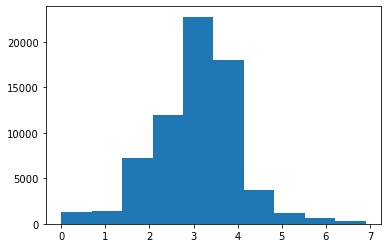

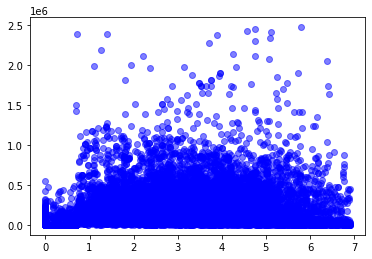

建物現況格局-廳


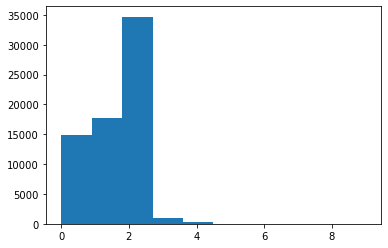

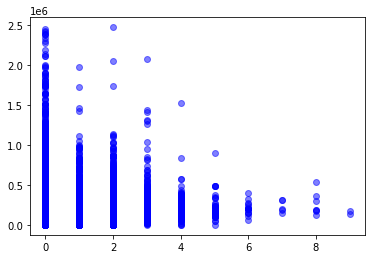

建物現況格局-房


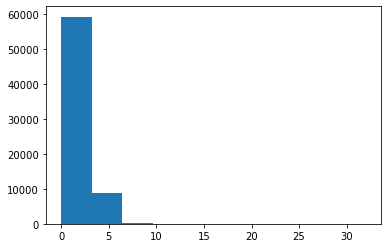

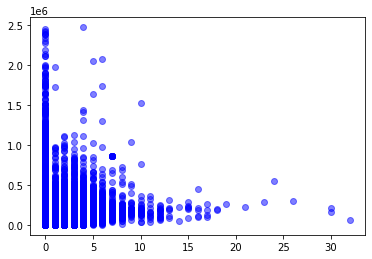

建物現況格局-衛


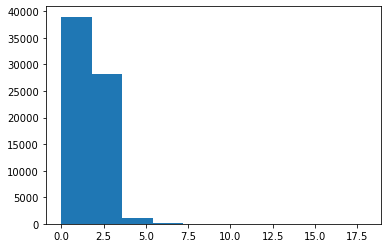

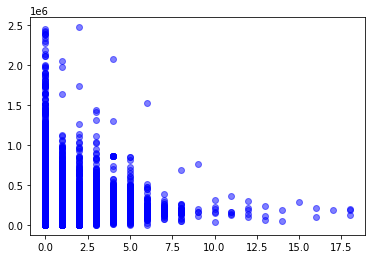

建物移轉總面積(平方公尺)


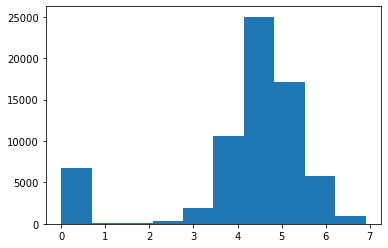

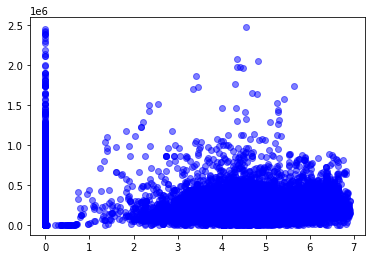

建築完成年月


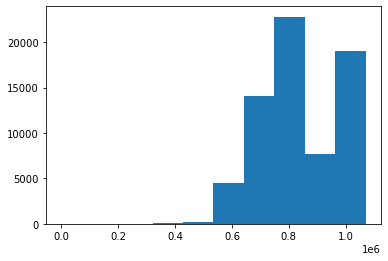

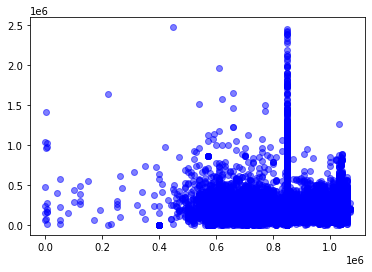

總價(元)


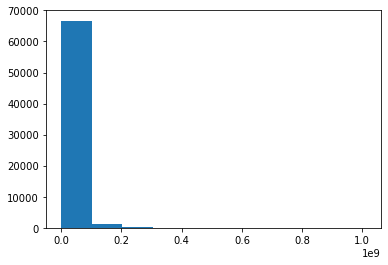

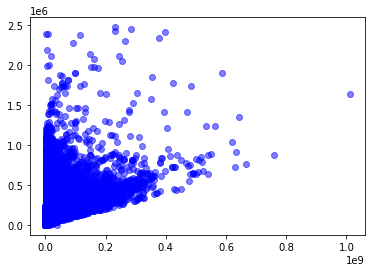

車位移轉總面積(平方公尺)


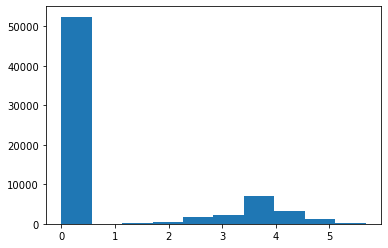

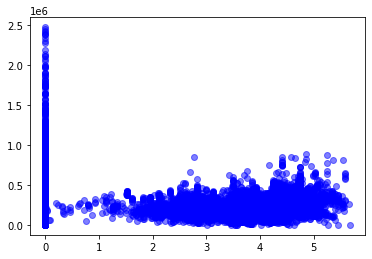

車位總價(元)


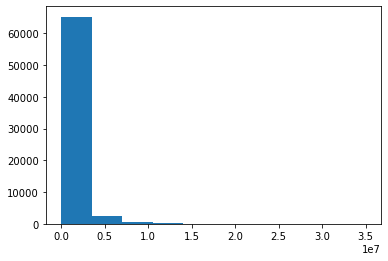

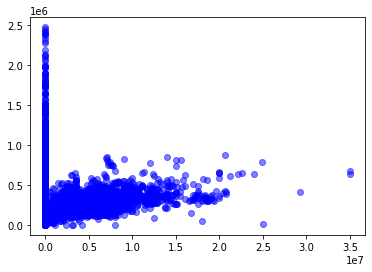

num_of_bus_stations_in_100m


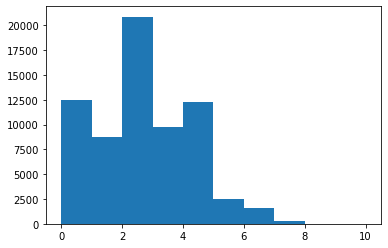

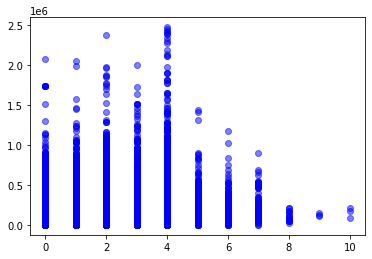

income_avg


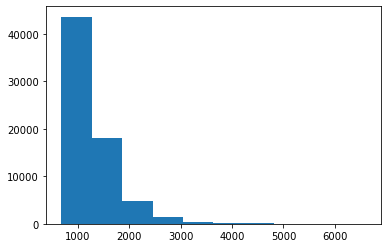

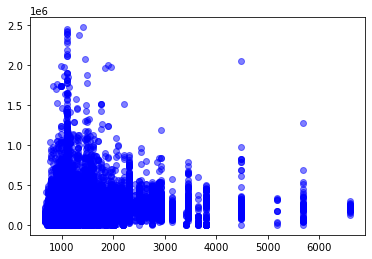

income_var


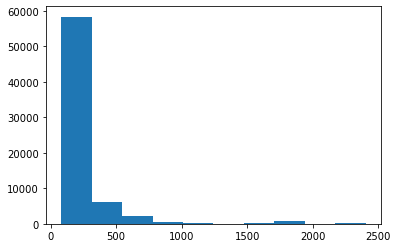

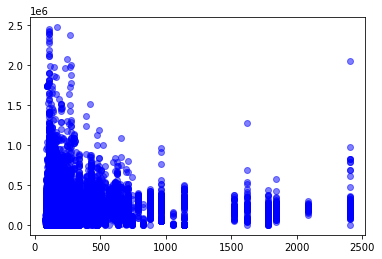

nearest_tarin_station_distance


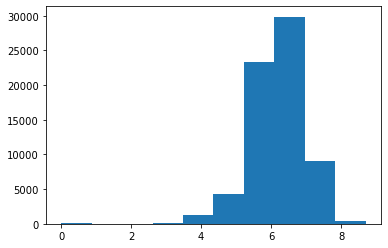

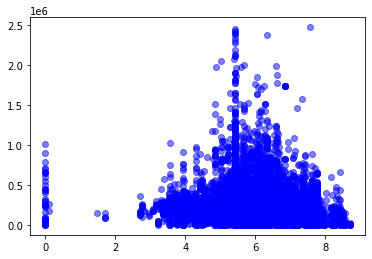

lat


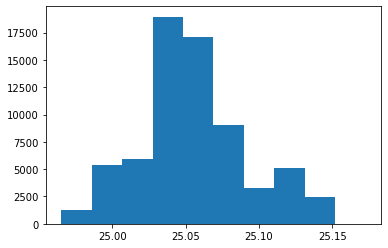

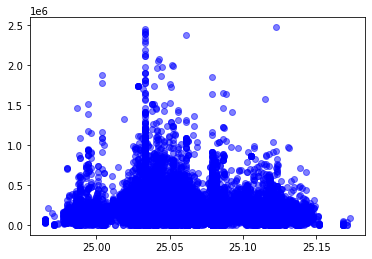

lng


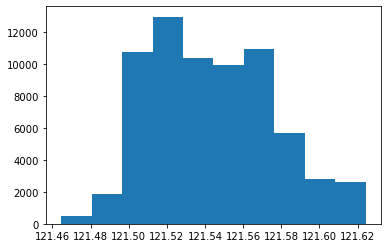

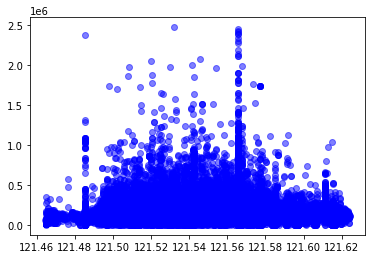

單價(元/平方公尺)


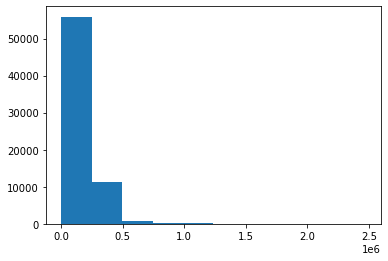

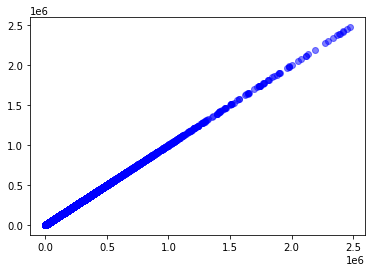

transaction_year_feature


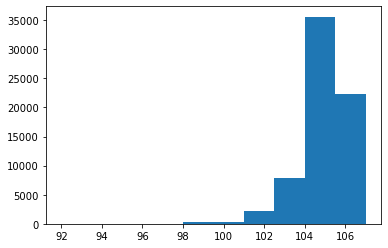

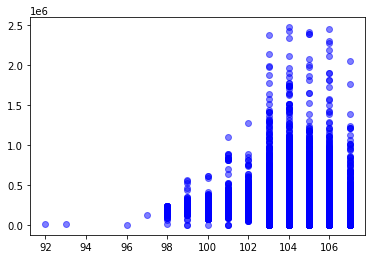

In [15]:
import seaborn as sb

def draw_scat(cln):
#     sb.distplot(train[cln])
    X = train[cln]
    Y = train['單價(元/平方公尺)']
    print(cln)
    plt.hist(X)
    plt.show()
    plt.scatter(X, Y, c='b', alpha=0.5)
    plt.show()
    
cln = [col for col in train.columns if train[col].dtype in [np.float64, np.int64]]

for col in cln:
    draw_scat(col)

# 確認分類缺失

In [16]:
from sklearn.preprocessing import OneHotEncoder

def cat_it(cln):
    a = train[cln].astype(str).values
    b = test[cln].astype(str).values
    categories = sorted(list(set(a)))
    enc = OneHotEncoder(categories=[categories], handle_unknown='ignore')
    train_onehot = enc.fit_transform(a.reshape(-1,1)).toarray()
    test_onehot = enc.fit_transform(b.reshape(-1,1)).toarray()
    return train_onehot, test_onehot

material_onehot, test_material_onehot = cat_it('主要建材')
usage_onehot, test_usage_onehot = cat_it('主要用途')
transaction_onehot, test_transaction_onehot = cat_it('交易標的')
building_type_onehot, test_building_type_onehot = cat_it('建物型態')
land_usage_cat_onehot, test_land_usage_cat_onehot = cat_it('都市土地使用分區')
dist_onehot, test_dist_onehot = cat_it('鄉鎮市區')
train_station_onehot, test_train_station_onehot = cat_it('nearest_tarin_station')
location_type_onehot, test_location_type_onehot = cat_it('location_type')
park_type_onehot, test_park_type_onehot = cat_it('車位類別')

# Management T/F

In [17]:
train['managed'] = train['有無管理組織'].apply(lambda x: 1 if x == '有' else 0)
test['managed'] = test['有無管理組織'].apply(lambda x: 1 if x == '有' else 0)

train['layout'] = train['建物現況格局-隔間'].apply(lambda x: 1 if x == '有' else 0)
test['layout'] = test['建物現況格局-隔間'].apply(lambda x: 1 if x == '有' else 0)


# 分割交易筆棟數

In [18]:
train['land'] = train['交易筆棟數'].apply(lambda s: int(re.findall(r'土地(\d)', s)[0]))
train['build'] = train['交易筆棟數'].apply(lambda s: int(re.findall(r'建物(\d)', s)[0]))
train['park'] = train['交易筆棟數'].apply(lambda s: int(re.findall(r'車位(\d)', s)[0]))

test['land'] = test['交易筆棟數'].apply(lambda s: int(re.findall(r'土地(\d)', s)[0]))
test['build'] = test['交易筆棟數'].apply(lambda s: int(re.findall(r'建物(\d)', s)[0]))
test['park'] = test['交易筆棟數'].apply(lambda s: int(re.findall(r'車位(\d)', s)[0]))

# Predict

In [19]:
X_columns = [col for col in train.columns if train[col].dtype in [np.float64, np.int64]]
X_columns.remove('單價(元/平方公尺)')

In [20]:
from  sklearn.model_selection import train_test_split

X = train[X_columns].values
X = np.concatenate(
    [X, material_onehot, usage_onehot, transaction_onehot, building_type_onehot, land_usage_cat_onehot, dist_onehot, train_station_onehot, location_type_onehot, park_type_onehot],
    axis=1
)
Y = train[['單價(元/平方公尺)']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1212)

# XGBRegressor

In [22]:
import xgboost
from sklearn.metrics import r2_score

gpuconf = { 
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    'max_depth': 5,
    'n_estimators': 1300, #1000
    'learning_rate': 0.02, #0.08
    'gamma': 0,
    'subsample': 0.7,
    'n_jobs': 4,
    'objective': 'reg:linear',
    'alpha': 0.00006
}

cpuconf = { 
    'max_depth': 5,
    'n_estimators': 2000,#2000,
    'learning_rate': 0.01,#0.01,
    'gamma': 0,
    'subsample': 0.7,
    'n_jobs': 4,
    'objective': 'reg:linear',
    'alpha': 0.00006
}

xgb = xgboost.XGBRegressor(**cpuconf)

xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)
# print(f'R2 Score: {r2_score(np.expm1(Y_test), np.expm1(predictions))}')
print(f'R2 Score: {r2_score(Y_test, predictions)}')

[16:42:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.971943506532644


In [23]:
X = test[X_columns].values
X = np.concatenate(
    [X, test_material_onehot, test_usage_onehot, test_transaction_onehot, test_building_type_onehot, test_land_usage_cat_onehot, test_dist_onehot, test_train_station_onehot, test_location_type_onehot, test_park_type_onehot],
    axis=1
)

predictions = xgb.predict(X)
my_submission = pd.DataFrame({'index':submission.index,'price_per_ping': predictions})
my_submission.to_csv('submission.csv', index=False)
print(predictions)

[191729.61 135422.14 216281.94 ... 269100.66 179799.64 203682.9 ]
